In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras import preprocessing
from keras.utils import pad_sequences
import sklearn.preprocessing as pre
import numpy as np
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Bidirectional
from sklearn.preprocessing import LabelBinarizer

In [2]:
data=pd.read_csv('data.csv')
data.tail()

,Sentence,Sentiment
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [3]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [4]:
x=data.iloc[:3841,0]
y=data.iloc[:3841,1]

In [5]:
binr=pre.OneHotEncoder()
y=binr.fit_transform(np.c_[y]).toarray()
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
x=data.iloc[:3841,0].tolist()
print(x)

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .", '$ESI on lows, down $1.50 to $2.50 BK a real possibility', "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .", 'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .', 'The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .', "$SPY wouldn't be surprised to see a green close", "Shell's $70 Billion BG Deal Meets Shareholder Skepticism", 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimat

In [7]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
maxlen=10
x=pad_sequences(sequences,maxlen = 10)
x

array([[3058, 3059,  736, ..., 3060,  535,  440],
       [  69,   19,  178, ...,    6,  238, 3061],
       [ 905,  793,   21, ...,   67,    2, 3063],
       ...,
       [   4, 1823,   59, ...,   57,  194,  544],
       [  56,   11,   54, ...,    6,   30,  127],
       [ 256,  159,    7, ...,  238,  509,  138]])

In [8]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=10))
model.add(SimpleRNN(120, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x, y,epochs=30,batch_size=3000,validation_split=0.2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 8)             80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 120)               15480     
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 3)                 363       
                                                                 
Total params: 95843 (374.39 KB)
Trainable params: 95843 (374.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30


2/2 [==============================] - 1s 291ms/step - loss: 1.0975 - acc: 0.3883 - val_loss: 1.0823 - val_acc: 0.5384
Epoch 2/30
2/2 [

In [9]:
# tokenizer.fit_on_texts(data.iloc[3841:5843,0].tolist())
sequences = tokenizer.texts_to_sequences(data.iloc[3841:5843,0].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[ 332,  103,   49, ..., 1157,    1,  205],
       [1692,  105,   11, ...,    8,  296, 1063],
       [3519,    2,   70, ..., 1230,  513,  127],
       ...,
       [ 245,    1,  841, ...,  449,   94, 1372],
       [  25,  105,   16, ..., 4749,   38,   15],
       [1052, 1145,   11, ...,  241,    5,  272]])

In [10]:
predict_result=model.predict(x_test)
predict_result=binr.inverse_transform(predict_result)
predict_result

63/63 [==============================] - 0s 2ms/step


array([['neutral'],
       ['positive'],
       ['neutral'],
       ...,
       ['neutral'],
       ['positive'],
       ['positive']], dtype=object)

In [11]:
df=data.iloc[3841:5843,1]
actual_results=pd.DataFrame(df)
actual_results = actual_results.rename(columns={"Sentiment": 'Actual Results'})
actual_results

,Actual Results
3841,positive
3842,neutral
3843,positive
3844,neutral
3845,negative
...,...
5837,negative
5838,neutral
5839,neutral
5840,neutral


In [12]:
actual_results["Predicted Results"]=predict_result
actual_results

,Actual Results,Predicted Results
3841,positive,neutral
3842,neutral,positive
3843,positive,neutral
3844,neutral,positive
3845,negative,neutral
...,...,...
5837,negative,neutral
5838,neutral,positive
5839,neutral,neutral
5840,neutral,positive


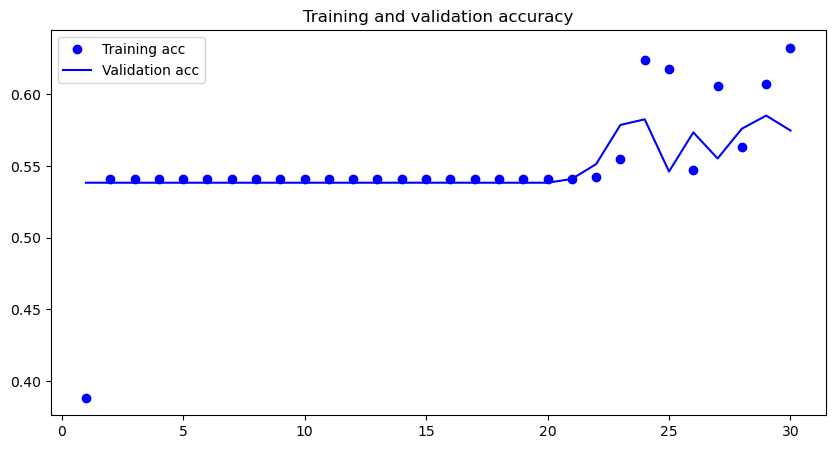

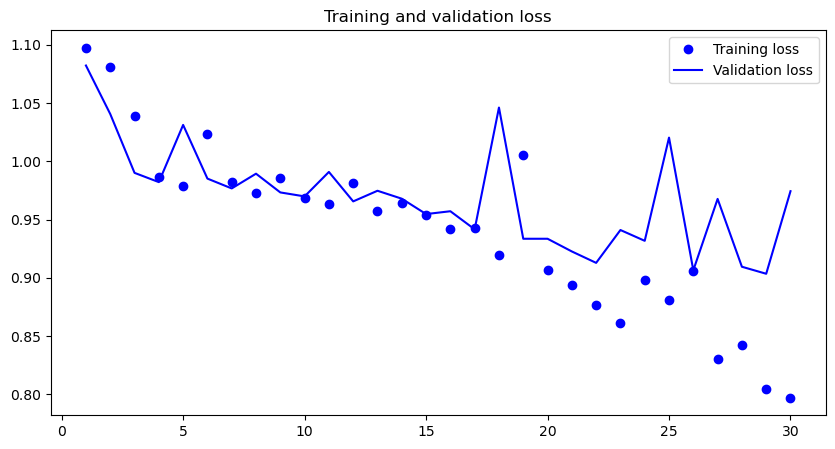

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [14]:
import sqlite3
conn = sqlite3.connect('rnn_results.db')
actual_results.to_sql('actual_results', conn, index=False, if_exists='replace')
conn.commit()
conn.close()


In [15]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=10))
model.add(LSTM(120, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x, y,epochs=30,batch_size=3000,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 8)             80000     
                                                                 
 lstm (LSTM)                 (None, 120)               61920     
                                                                 
 flatten_1 (Flatten)         (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 363       
                                                                 
Total params: 142283 (555.79 KB)
Trainable params: 142283 (555.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2/2 [==============================] - 2s 299ms/step - loss: 1.0976 - acc: 0.4889 - val_loss: 1.0861 - val_acc: 0.5384
Epoch 2/30
2/2 [

In [16]:
# tokenizer.fit_on_texts(data.iloc[3841:5843,0].tolist())
sequences = tokenizer.texts_to_sequences(data.iloc[3841:5843,0].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[ 332,  103,   49, ..., 1157,    1,  205],
       [1692,  105,   11, ...,    8,  296, 1063],
       [3519,    2,   70, ..., 1230,  513,  127],
       ...,
       [ 245,    1,  841, ...,  449,   94, 1372],
       [  25,  105,   16, ..., 4749,   38,   15],
       [1052, 1145,   11, ...,  241,    5,  272]])

In [17]:
predict_result=model.predict(x_test)
predict_result=binr.inverse_transform(predict_result)
predict_result

63/63 [==============================] - 0s 4ms/step


array([['neutral'],
       ['neutral'],
       ['neutral'],
       ...,
       ['neutral'],
       ['neutral'],
       ['neutral']], dtype=object)

In [18]:
df=data.iloc[3841:5843,1]
actual_results=pd.DataFrame(df)
actual_results = actual_results.rename(columns={"Sentiment": 'Actual Results'})
actual_results

,Actual Results
3841,positive
3842,neutral
3843,positive
3844,neutral
3845,negative
...,...
5837,negative
5838,neutral
5839,neutral
5840,neutral


In [19]:
actual_results["Predicted Results"]=predict_result
actual_results

,Actual Results,Predicted Results
3841,positive,neutral
3842,neutral,neutral
3843,positive,neutral
3844,neutral,neutral
3845,negative,neutral
...,...,...
5837,negative,neutral
5838,neutral,neutral
5839,neutral,neutral
5840,neutral,neutral


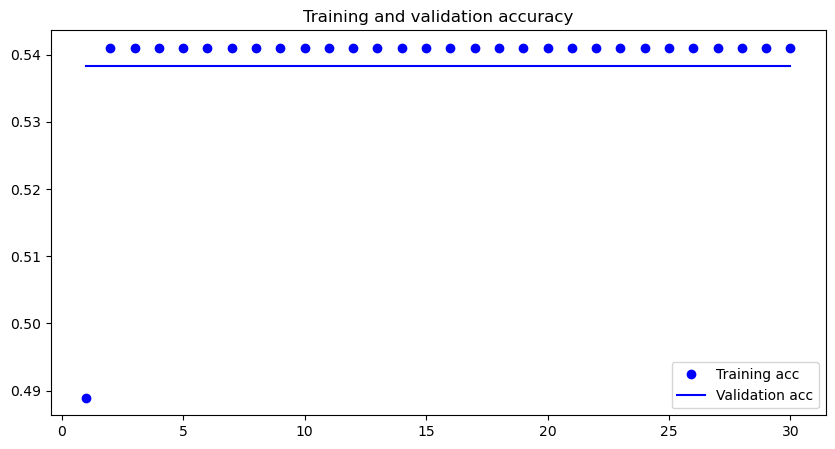

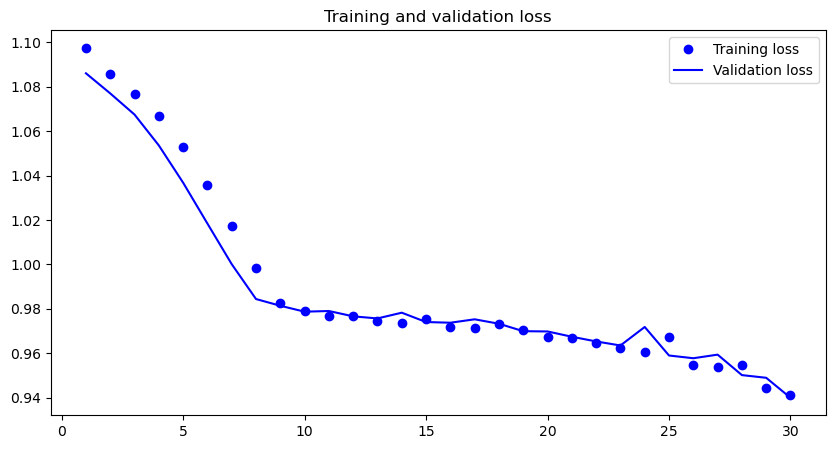

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [21]:
import sqlite3
conn = sqlite3.connect('lstm_results.db')
actual_results.to_sql('actual_results', conn, index=False, if_exists='replace')
conn.commit()
conn.close()


In [22]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=10))
model.add(GRU(120, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x, y,epochs=30,batch_size=3000,validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 8)             80000     
                                                                 
 gru (GRU)                   (None, 120)               46800     
                                                                 
 flatten_2 (Flatten)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 363       
                                                                 
Total params: 127163 (496.73 KB)
Trainable params: 127163 (496.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2/2 [==============================] - 2s 293ms/step - loss: 1.0976 - acc: 0.4857 - val_loss: 1.0789 - val_acc: 0.5384
Epoch 2/30
2/2 [

In [23]:
# tokenizer.fit_on_texts(data.iloc[3841:5843,0].tolist())
sequences = tokenizer.texts_to_sequences(data.iloc[3841:5843,0].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[ 332,  103,   49, ..., 1157,    1,  205],
       [1692,  105,   11, ...,    8,  296, 1063],
       [3519,    2,   70, ..., 1230,  513,  127],
       ...,
       [ 245,    1,  841, ...,  449,   94, 1372],
       [  25,  105,   16, ..., 4749,   38,   15],
       [1052, 1145,   11, ...,  241,    5,  272]])

In [24]:
predict_result=model.predict(x_test)
predict_result=binr.inverse_transform(predict_result)
predict_result

63/63 [==============================] - 0s 3ms/step


array([['neutral'],
       ['neutral'],
       ['neutral'],
       ...,
       ['neutral'],
       ['neutral'],
       ['neutral']], dtype=object)

In [25]:
df=data.iloc[3841:5843,1]
actual_results=pd.DataFrame(df)
actual_results = actual_results.rename(columns={"Sentiment": 'Actual Results'})
actual_results

,Actual Results
3841,positive
3842,neutral
3843,positive
3844,neutral
3845,negative
...,...
5837,negative
5838,neutral
5839,neutral
5840,neutral


In [28]:
actual_results["Predicted Results"]=predict_result
actual_results

,Actual Results,Predicted Results
3841,positive,neutral
3842,neutral,neutral
3843,positive,neutral
3844,neutral,neutral
3845,negative,neutral
...,...,...
5837,negative,neutral
5838,neutral,neutral
5839,neutral,neutral
5840,neutral,neutral


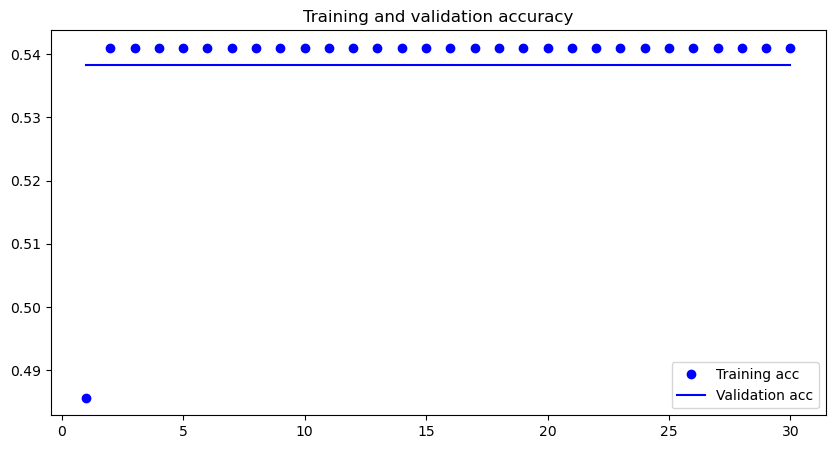

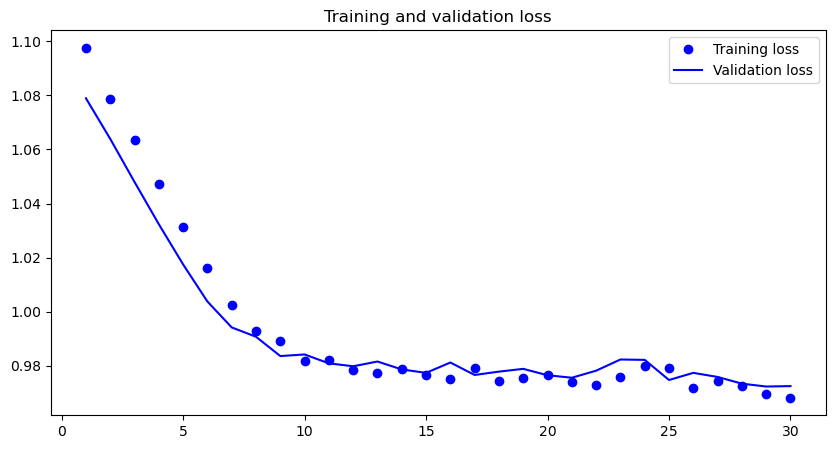

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))  # Set the width and height of the figure
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [30]:
import sqlite3
conn = sqlite3.connect('gru_results.db')
actual_results.to_sql('actual_results', conn, index=False, if_exists='replace')
conn.commit()
conn.close()
